In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [70]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["score_difference", "type.id", "relative_strength", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [71]:
# Reset the modules
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

import process_data
training_data = process_data.load_data(interpolated_dir, 
                                       years = [2016, 2017,2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win")

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )


Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
  Processing 254 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2017/game_400951752.csv
  Completed processing 2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  NaN foun

In [72]:
# Get information about the data
training_data = dict(sorted(training_data.items()))
for timestep in training_data:
    print(f"timestep: {timestep}, number of instances: {len(training_data[timestep])}")

timestep: 0.0, number of instances: 3244
timestep: 0.005, number of instances: 1142
timestep: 0.01, number of instances: 2157
timestep: 0.015, number of instances: 1805
timestep: 0.02, number of instances: 2016
timestep: 0.025, number of instances: 2086
timestep: 0.03, number of instances: 1976
timestep: 0.035, number of instances: 2157
timestep: 0.04, number of instances: 2047
timestep: 0.045, number of instances: 2177
timestep: 0.05, number of instances: 2126
timestep: 0.055, number of instances: 2038
timestep: 0.06, number of instances: 2220
timestep: 0.065, number of instances: 2157
timestep: 0.07, number of instances: 2181
timestep: 0.075, number of instances: 2135
timestep: 0.08, number of instances: 2193
timestep: 0.085, number of instances: 2211
timestep: 0.09, number of instances: 2122
timestep: 0.095, number of instances: 2207
timestep: 0.1, number of instances: 2178
timestep: 0.105, number of instances: 2161
timestep: 0.11, number of instances: 2234
timestep: 0.115, number o

In [73]:
for timestep in test_data:
    print(f"timestep: {timestep}, number of instances: {len(test_data[timestep])}")

timestep: 0.0, number of instances: 343
timestep: 0.005, number of instances: 426
timestep: 0.01, number of instances: 373
timestep: 0.015, number of instances: 476
timestep: 0.02, number of instances: 378
timestep: 0.025, number of instances: 481
timestep: 0.03, number of instances: 418
timestep: 0.035, number of instances: 455
timestep: 0.04, number of instances: 476
timestep: 0.045, number of instances: 430
timestep: 0.05, number of instances: 468
timestep: 0.055, number of instances: 501
timestep: 0.06, number of instances: 466
timestep: 0.065, number of instances: 470
timestep: 0.07, number of instances: 459
timestep: 0.075, number of instances: 500
timestep: 0.08, number of instances: 477
timestep: 0.085, number of instances: 437
timestep: 0.09, number of instances: 522
timestep: 0.095, number of instances: 464
timestep: 0.1, number of instances: 503
timestep: 0.105, number of instances: 474
timestep: 0.11, number of instances: 477
timestep: 0.115, number of instances: 458
timest

In [110]:
other_features = [
            "type.id",             # Play type (categorical)
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
    "field_position_shift"
]

In [ ]:
# Setup model for each timestep
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
# create an array of logistic regression models

modules_to_reload = [
    'models.logistic_regression',
    'models.Model'
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
from models.Model import Model
from models.logistic_regression import setup_logistic_regression_models

models = setup_logistic_regression_models(training_data, validation_data, numeric_features, other_features, features, optimize_hyperparams=True)


Processing timestep: 0.0


Best trial: 21. Best value: 0.635932: 100%|██████████| 50/50 [00:04<00:00, 11.16it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 0.00% (Optimized): Training Loss = 0.6245, Accuracy = 0.6436, Test Loss = 0.6359, Test Accuracy = 0.6635
Processing timestep: 0.005


Best trial: 25. Best value: 0.682942: 100%|██████████| 50/50 [00:02<00:00, 22.93it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 0.50% (Optimized): Training Loss = 0.6468, Accuracy = 0.6401, Test Loss = 0.6829, Test Accuracy = 0.5323
Processing timestep: 0.01


Best trial: 31. Best value: 0.642701:  76%|███████▌  | 38/50 [00:04<00:00, 14.79it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 31. Best value: 0.642701: 100%|██████████| 50/50 [00:05<00:00,  8.63it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 1.00% (Optimized): Training Loss = 0.6193, Accuracy = 0.6430, Test Loss = 0.6427, Test Accuracy = 0.6269
Processing timestep: 0.015


Best trial: 31. Best value: 0.649183: 100%|██████████| 50/50 [00:23<00:00,  2.16it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 1.50% (Optimized): Training Loss = 0.6237, Accuracy = 0.6449, Test Loss = 0.6492, Test Accuracy = 0.6285
Processing timestep: 0.02


Best trial: 8. Best value: 0.671141:  36%|███▌      | 18/50 [00:01<00:03,  9.15it/s]/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
Best trial: 25. Best value: 0.670953: 100%|██████████| 50/50 [00:02<00:00, 17.25it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 2.00% (Optimized): Training Loss = 0.6339, Accuracy = 0.6448, Test Loss = 0.6710, Test Accuracy = 0.5813
Processing timestep: 0.025


Best trial: 32. Best value: 0.629979: 100%|██████████| 50/50 [00:02<00:00, 22.84it/s]


Timestep 2.50% (Optimized): Training Loss = 0.6329, Accuracy = 0.6352, Test Loss = 0.6300, Test Accuracy = 0.6487
Processing timestep: 0.03


Best trial: 49. Best value: 0.642564: 100%|██████████| 50/50 [00:03<00:00, 16.09it/s]


Timestep 3.00% (Optimized): Training Loss = 0.6238, Accuracy = 0.6457, Test Loss = 0.6426, Test Accuracy = 0.6541
Processing timestep: 0.035


Best trial: 25. Best value: 0.668949: 100%|██████████| 50/50 [00:02<00:00, 18.48it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 3.50% (Optimized): Training Loss = 0.6290, Accuracy = 0.6426, Test Loss = 0.6689, Test Accuracy = 0.5774
Processing timestep: 0.04


Best trial: 41. Best value: 0.669059: 100%|██████████| 50/50 [00:03<00:00, 16.03it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Timestep 4.00% (Optimized): Training Loss = 0.6265, Accuracy = 0.6468, Test Loss = 0.6691, Test Accuracy = 0.5987
Processing timestep: 0.045


Best trial: 41. Best value: 0.646232: 100%|██████████| 50/50 [00:02<00:00, 17.70it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 4.50% (Optimized): Training Loss = 0.6261, Accuracy = 0.6472, Test Loss = 0.6462, Test Accuracy = 0.6170
Processing timestep: 0.05


Best trial: 13. Best value: 0.633318: 100%|██████████| 50/50 [00:04<00:00, 12.38it/s]
/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Timestep 5.00% (Optimized): Training Loss = 0.6211, Accuracy = 0.6533, Test Loss = 0.6333, Test Accuracy = 0.6540
Processing timestep: 0.055


Best trial: 15. Best value: 0.636286:  30%|███       | 15/50 [00:01<00:02, 15.71it/s]

In [ ]:
def setup_single_model(training_data, test_data):
    # Flatten all training data into single arrays
    X_train = []
    y_train = []
    timesteps_train = []
    for timestep in training_data:
        for row in training_data[timestep]:
            X_train.append(row["rows"].reshape(-1))
            y_train.append(row["label"])
            timesteps_train.append(timestep)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    timesteps_train = np.array(timesteps_train).reshape(-1, 1)  # Column vector

    # Flatten all test data into single arrays
    X_test = []
    y_test = []
    timesteps_test = []
    for timestep in test_data:
        for row in test_data[timestep]:
            X_test.append(row["rows"].reshape(-1))
            y_test.append(row["label"])
            timesteps_test.append(timestep)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    timesteps_test = np.array(timesteps_test).reshape(-1, 1)

    # # Optionally add timestep as a feature
    # X_train = np.hstack([X_train, timesteps_train])
    # X_test = np.hstack([X_test, timesteps_test])

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    train_loss = -np.mean(y_train * np.log(y_train_pred + 1e-15) + (1 - y_train) * np.log(1 - y_train_pred + 1e-15))
    train_accuracy = model.score(X_train, y_train)

    y_test_pred = model.predict_proba(X_test)[:, 1]
    test_loss = -np.mean(y_test * np.log(y_test_pred + 1e-15) + (1 - y_test) * np.log(1 - y_test_pred + 1e-15))
    test_accuracy = model.score(X_test, y_test)

    print(f"Training Loss = {train_loss:.4f}, Accuracy = {train_accuracy:.4f}, Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return model


model = setup_single_model(training_data, test_data)

Training Loss = 0.4622, Accuracy = 0.7729, Test Loss = 0.4720, Test Accuracy = 0.7605


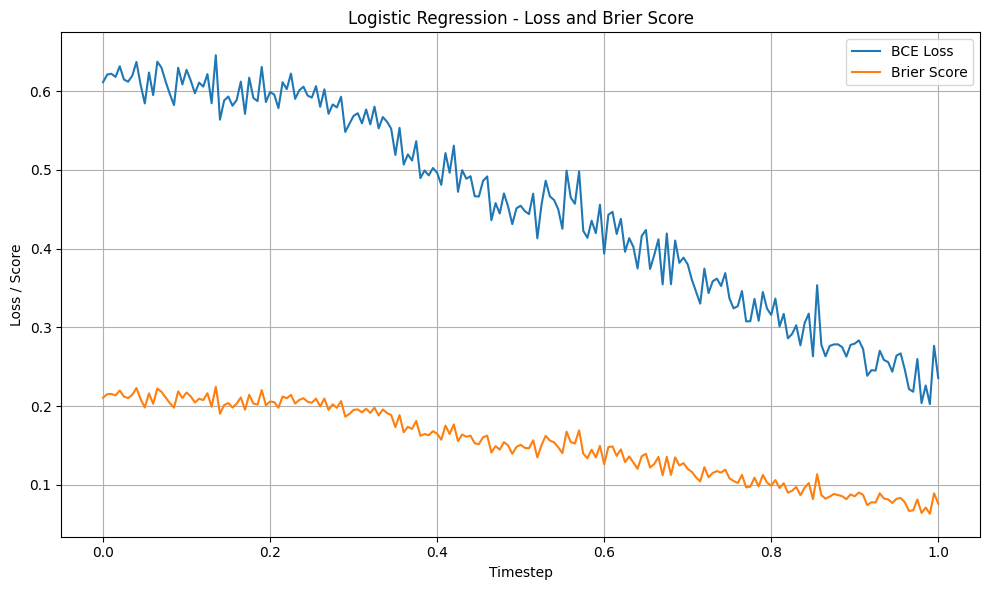

In [ ]:
# # Test accuracy of model for each timestep on test data and plot
# accuracies = []
# timesteps = []
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")
# process_data.plot_accuracy(models, test_data, "Logistic Regression")

In [ ]:
# Save the model
import pickle
filename = 'logistic_regression_model.pickle'
pickle.dump(models, open(filename, 'wb'))

In [47]:
from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "LR_phat_b_model")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces

# For Debugging Purposes